<a href="https://colab.research.google.com/github/davidfague/single-cell-tuning/blob/main/allen_segregated_newFit_FI_syn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading and building cells from AllenDB

Useful links:
1. [Database](http://celltypes.brain-map.org/data)
2. [Downloading biophysical models](https://allensdk.readthedocs.io/en/latest/biophysical_models.html)
3. [Example on building cells](https://alleninstitute.github.io/AllenSDK/_static/examples/nb/pulse_stimulus.html)

In [ ]:
!pip install --upgrade pip
!pip install --quiet allensdk neuron

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 110.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 94.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 109.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 973.1/973.1 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━

In [ ]:
from allensdk.api.queries.biophysical_api import BiophysicalApi
from allensdk.model.biophys_sim.config import Config
from allensdk.model.biophysical.utils import Utils
import os
import json
import matplotlib.pyplot as plt

## Download the cell

In [ ]:
bp = BiophysicalApi()
specimen_id = 476686112
# Mouse Layer 5 Primary visual area neuron
# http://celltypes.brain-map.org/experiment/electrophysiology/476686112
bp.get_neuronal_models(specimen_id)

[{'id': 477878284,
  'name': 'Biophysical - perisomatic_Sst-IRES-Cre;Ai14-188740.03.02.01',
  'neuron_reconstruction_id': 491119369,
  'neuronal_model_template_id': 329230710,
  'specimen_id': 476686112},
 {'id': 497232660,
  'name': 'Biophysical - all active_Sst-IRES-Cre;Ai14-188740.03.02.01',
  'neuron_reconstruction_id': 491119369,
  'neuronal_model_template_id': 491455321,
  'specimen_id': 476686112}]

In [ ]:
# Download the cell with passive dendrites
bp.cache_stimulus = False # Change to False to not download the large stimulus NWB file
bp.cache_data(477878284) # 'id'

2025-02-13 19:32:16,646 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/657210401
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/657210401
2025-02-13 19:32:20,072 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/657210404
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/657210404
2025-02-13 19:32:20,244 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/395337293
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/395337293
2025-02-13 19:32:24,168 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_fi

In [ ]:
# saving the original _fit.json instead.

# # store original values
# description = Config().load('manifest.json')
# utils = Utils(description)
# original_fit = utils.description.data
# del utils
# del description

## use segregated modfiles

In [ ]:
# replace the modfiles with 'segregated' so the ion channels are 100% closed at voltages that they should not be active at
segregate_modfiles = True
if segregate_modfiles:
  import shutil
  shutil.rmtree("modfiles/")
  !git clone -b release_candidate https://github.com/V-Marco/ACT/
  # move the modfiles from the other repo
  # https://github.com/V-Marco/ACT/tree/release_candidate/data/SST/seg/modfiles -> /content/modfiles
  !mv ACT/data/SST/seg/modfiles/ /content/modfiles/

Cloning into 'ACT'...
remote: Enumerating objects: 4382, done.
remote: Counting objects: 100% (409/409), done.
remote: Compressing objects: 100% (292/292), done.
remote: Total 4382 (delta 193), reused 259 (delta 98), pack-reused 3973 (from 1)
Receiving objects: 100% (4382/4382), 153.06 MiB | 20.14 MiB/s, done.
Resolving deltas: 100% (2011/2011), done.


In [ ]:
# get synapse modfiles # do here to compile them with the rest.

if not 'vecevent.mod' in os.listdir("modfiles"):
  !git clone https://github.com/davidfague/Neural-Modeling/
  # move the modfiles from the other repo
  # https://github.com/davidfague/Neural-Modeling/tree/release_candidate/data/SST/seg/modfiles/{synapse_modfiles} -> /content/modfiles/

  !mv Neural-Modeling/modfiles/hay/AMPA_NMDA.mod /content/modfiles/
  !mv Neural-Modeling/modfiles/hay/GABA_AB.mod /content/modfiles/
  !mv Neural-Modeling/modfiles/hay/vecevent.mod /content/modfiles/

Cloning into 'Neural-Modeling'...
remote: Enumerating objects: 5133, done.
remote: Counting objects: 100% (302/302), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 5133 (delta 256), reused 228 (delta 210), pack-reused 4831 (from 1)
Receiving objects: 100% (5133/5133), 54.02 MiB | 23.60 MiB/s, done.
Resolving deltas: 100% (3500/3500), done.


## Update the fit.json if needed.

In [ ]:
update_fit = True
if update_fit:
  # !git clone https://github.com/davidfague/single-cell-tuning.git # get the new file
  !git clone https://github.com/cyneuro/single-cell-tuning.git # get the new file
  !mv 476686112_fit.json 476686112_allen_fit.json # rename old to save it
  !mv single-cell-tuning/476686112_fit.json 476686112_fit.json # replace the file

  # alternatively, change the manifest

Cloning into 'single-cell-tuning'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 33 (delta 8), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (33/33), 123.94 KiB | 1.77 MiB/s, done.
Resolving deltas: 100% (8/8), done.


## Build the cell

In [ ]:
# Compile the modfiles
!nrnivmodl modfiles

/usr/local/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
/content
Mod files: "modfiles/modfiles/AMPA_NMDA.mod" "modfiles/modfiles/CaDynamics.mod" "modfiles/modfiles/Ca_HVA.mod" "modfiles/modfiles/Ca_LVA.mod" "modfiles/modfiles/GABA_AB.mod" "modfiles/modfiles/Ih.mod" "modfiles/modfiles/Im.mod" "modfiles/modfiles/Im_v2.mod" "modfiles/modfiles/Kd.mod" "modfiles/modfiles/K_P.mod" "modfiles/modfiles/K_T.mod" "modfiles/modfiles/Kv2like.mod" "modfiles/modfiles/Kv3_1.mod" "modfiles/modfiles/Nap.mod" "modfiles/modfiles/NaTa.mod" "modfiles/modfiles/NaTs.mod" "modfiles/modfiles/NaV.mod" "modfiles/modfiles/SK.mod" "modfiles/modfiles/vecevent.mod"

Creating 'x86_64' directory for .o files.

 -> NMODL ../modfiles/AMPA_NMDA.mod
 -> Compiling mod_func.cpp
 -> NMODL ../modfiles/CaDynamics.mod
 -> NMODL ../modfiles/Ca_HVA.mod
Translating AMPA_NMDA.mod into /content/x86_64/AM

In [ ]:
# Create the h object
description = Config().load('manifest.json')
utils = Utils(description)
h = utils.h

# Convert all "value" attributes to floats
for dict in utils.description.data['genome']:
    for key, value in dict.items():
        if key == 'value': dict[key] = float(value)

In [ ]:
# Configure morphology
manifest = description.manifest
morphology_path = description.manifest.get_path('MORPHOLOGY')
utils.generate_morphology(morphology_path.encode('ascii', 'ignore'))
utils.load_cell_parameters()

warning ./Sst-IRES-Cre_Ai14-188740.03.02.01_657210399_m.swc: more than one tree:
  root at line 4
  root at line 14504
  root at line 14725
  root at line 14798
  root at line 15141
  root at line 15144
  root at line 15156
  root at line 15211
  root at line 15318
  root at line 15496
  root at line 15811
  root at line 15857
  root at line 15883
  root at line 16161
  root at line 16200
  root at line 16210
  root at line 16253
  root at line 16286
  root at line 16301
  root at line 16326
  root at line 16574
  root at line 16613
  root at line 16618
  root at line 16645
  root at line 16695
  root at line 16751
  root at line 16765
  root at line 16768


### MARK1

In [ ]:
# # try fitting passive properties
# # Get this from the built cell
# computed_soma_area = 5.036323076932052e-06 # (cm2)

# user_provided_Rin = 195.4 * 1e6 # 10e6 # (to Ohm from MOhm)
# user_provided_tau = 15.6 * 1e-3 # (to s from ms)
# user_provided_Vrest = -71 # (mV)

# g_bar_leak = (1 / user_provided_Rin) / computed_soma_area
# cm = user_provided_tau * g_bar_leak * 1e6
# print(f"E_leak: {user_provided_Vrest}")
# print(f"gbarleak: {g_bar_leak}")
# print(f"Cm: {cm}")

# fit_filename = os.path.join(f"{specimen_id}_fit.json")

# with open(fit_filename,'r') as file:
#     data = json.load(file)


# #set all sections cm to the same
# for item in data['passive']:
#     for field in item['cm']:
#         field['cm'] = cm


# for item in data["genome"]:
#   if (item['name'] == 'g_pas'):
#     item['value'] = g_bar_leak


# #set e_rev_leak in all sections
# data['passive'][0]['e_pas'] = user_provided_Vrest

# data['conditions'][0]['v_init'] = user_provided_Vrest

# with open(fit_filename, 'w') as file:
#     json.dump(data, file, indent=4)

In [ ]:
# try turning off everything but leak, Ca, H
for item in utils.description.data['genome']:
  # if item['name'] not in []
  print(item)

# utils.load_cell_parameters()

{'section': 'soma', 'name': 'gbar_Ih', 'value': 0.0, 'mechanism': 'Ih'}
{'section': 'soma', 'name': 'gbar_Nap', 'value': 0.0, 'mechanism': 'Nap'}
{'section': 'soma', 'name': 'gbar_NaTa', 'value': 0.0, 'mechanism': 'NaTa'}
{'section': 'soma', 'name': 'gbar_Kd', 'value': 8.903838040127954e-11, 'mechanism': 'Kd'}
{'section': 'soma', 'name': 'gbar_Kv2like', 'value': 0.0002725790772869774, 'mechanism': 'Kv2like'}
{'section': 'soma', 'name': 'gbar_Kv3_1', 'value': 0.10521580755926842, 'mechanism': 'Kv3_1'}
{'section': 'soma', 'name': 'gbar_K_T', 'value': 0.0, 'mechanism': 'K_T'}
{'section': 'soma', 'name': 'gbar_Im_v2', 'value': 2.8103810231817594e-07, 'mechanism': 'Im_v2'}
{'section': 'soma', 'name': 'gbar_SK', 'value': 3.095338402020649e-08, 'mechanism': 'SK'}
{'section': 'soma', 'name': 'gbar_Ca_HVA', 'value': 0.0008814678006675907, 'mechanism': 'Ca_HVA'}
{'section': 'soma', 'name': 'gbar_Ca_LVA', 'value': 0.002604826842658681, 'mechanism': 'Ca_LVA'}
{'section': 'soma', 'name': 'gamma_CaD

Now update those in the fit file. Restart the runtime and rebuild the cell.

### MARK2

In [ ]:
# # it is already built and we didn't adjust anything so we don't need to rebuild
# # Create the h object
# description = Config().load('manifest.json')
# utils = Utils(description)
# h = utils.h

# # Convert all "value" attributes to floats
# for dict in utils.description.data['genome']:
#     for key, value in dict.items():
#         if key == 'value': dict[key] = float(value)

# # Configure morphology
# manifest = description.manifest
# morphology_path = description.manifest.get_path('MORPHOLOGY')
# utils.generate_morphology(morphology_path.encode('ascii', 'ignore'))
# utils.load_cell_parameters()

In [ ]:
h.soma[0].diam = h.soma[0].diam * 2

In [ ]:
# Set current injection
CI_stim = h.IClamp(h.soma[0](0.5))
CI_stim.amp = -0.2
CI_stim.delay = 300.0
CI_stim.dur = 400.0
h.tstop = 1000.0
h.dt = 0.1
h.steps_per_ms = 1 / h.dt

In [ ]:
vec = utils.record_values()

In [ ]:
h.finitialize()
h.run()

0.0

Text(0, 0.5, 'Voltage (mV)')

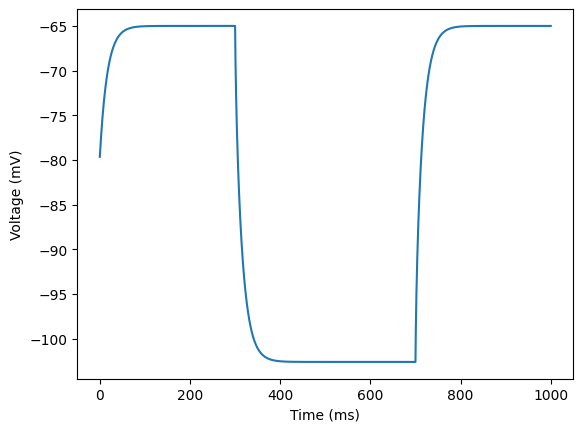

In [ ]:
plt.plot(vec['t'].as_numpy(), vec['v'].as_numpy())
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (mV)")

In [ ]:
# Adjust g-pas to this: (should already be done in the fit file)
# 0.00010161594458832541 * 1.5

# + Adjust cm to 2.5

In [ ]:
import numpy as np
def compute_gpp(passive_V: np.ndarray, dt: float, I_t_start: int, I_t_end: int, I_amp: float):
    '''
    Parameters:
    ----------
    I_t_start: float
        Current injection start time (ms).
    '''

    index_V_rest = int(I_t_start / dt) - 1

    # If there is no h channel, V_final == V_trough
    index_V_trough = index_V_rest + np.argmin(passive_V[index_V_rest:])
    index_V_final = int(I_t_end / dt) - 1

    V_rest = passive_V[index_V_rest]
    V_trough = passive_V[index_V_trough]
    V_final = passive_V[index_V_final]

    # R_in
    R_in = (V_rest - V_trough) / (0 - I_amp)

    # Tau1
    V_tau1 = V_rest - (V_rest - V_trough) * 0.632

    index_v_tau1 = next(
                index for index, voltage_value in enumerate(list(passive_V[index_V_rest:]))
                if voltage_value < V_tau1
            )
    tau1 = index_v_tau1 * dt

    # Tau2
    V_tau2 = V_trough - (V_trough - V_final) * 0.632
    index_v_tau2 = next(
                index for index, voltage_value in enumerate(list(passive_V[index_V_trough:]))
                if voltage_value > V_tau2
            )
    tau2 = index_v_tau2 * dt

    # Sag ratio
    sag = (V_final - V_trough) / (V_rest - V_trough)

    gpp = (R_in, tau1, tau2, sag)
    return gpp

In [ ]:
#R_in, tau1, tau2, sag_ratio)
trace = vec['v'].as_numpy()

res = list(compute_gpp(trace, h.dt, CI_stim.delay,CI_stim.delay + CI_stim.dur - 5, CI_stim.amp))
res.append(trace[int(CI_stim.delay / h.dt) - 1])
# print(f"R_in: {round(res[0],6)}\ntau1: {round(res[1],6)}\ntau2: {round(res[2],6)}\nsag: {round(res[3],6)}\nRMP: {round(res[4],6)}")
print(f"RMP: {round(res[4],6)}\ntau1: {round(res[1],6)}\ntau2: {round(res[2],6)}\nsag: {round(res[3],6)}\nR_in: {round(res[0],6)}")

RMP: -65.00314
tau1: 13.9
tau2: 0.1
sag: 0.0
R_in: 188.080386


In [ ]:
# Biophysical properties (mean±SD)


# SST

# RMP (mV)	    -65.75±3.76
# Rm (MOhm)	    188.7±9736
# Cm (pF)	      96.46±50.01
# Tau (ms)	    15.6±8.6
# Sag ratio	    0.85±0.09
# Rheobase (pA)	90±38.25
# Rin (MOhm)	  195.4±75.93

#PV (n=15)
# RMP (mV)      -71.25+5.6
# Rm (MOhm)     88.97±36.3
# Cm (pF)       78±50.18
# Tau (ms)      5.9±2.9
# Sag ratio     0.96±0.02
# Rheobase (pA) 225±112.2
# Rin (MOhm)    98.9±34.48

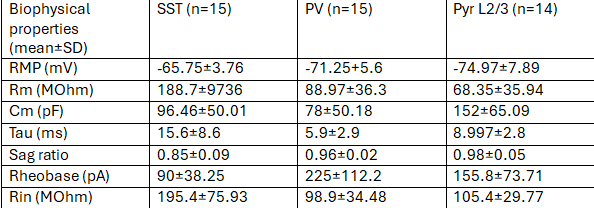

## Calculating FI

Turn on active conductances. Try setting them to allen values.

In [ ]:
# Open the allen JSON file and load it into a dictionary
with open("476686112_allen_fit.json", "r") as file:
    allen = json.load(file)

In [ ]:
# check what mechanisms are different
mechanisms = [mechanism['mechanism'] for mechanism in utils.description.data['genome']]
allen_mechanisms = [mechanism['mechanism'] for mechanism in allen['genome']]
print("mechanisms in current not in allen:")
for mechanism in mechanisms:
  if mechanism not in allen_mechanisms:
    print(mechanism)

print()
print("mechanisms in allen not in current:")
for mechanism in allen_mechanisms:
  if mechanism not in mechanisms:
    print(mechanism)

mechanisms in current not in allen:
Nap
NaTa

mechanisms in allen not in current:
NaV


In [ ]:
def get_index_with_section_and_name(data, section, name):
    indices = [idx for idx, item in enumerate(data['genome']) if item['section']=='soma' and item['name']==name]
    if len(indices) != 1:
      ValueError("should only find 1 indices")
    else:
      return indices[0]

def set_value_at_index(data, index, value, scale):
    data['genome'][index]['value'] = scale * value

def get_value_at_index(data, index):
    return data['genome'][index]['value']

def update_value_from_allen(allen_data, current_data, from_var_name, to_var_name, section='soma', scale = 1):
    current_index = get_index_with_section_and_name(current_data, section, to_var_name)
    allen_index = get_index_with_section_and_name(allen_data, section, from_var_name)
    set_value_at_index(current_data, current_index, get_value_at_index(allen_data, allen_index), scale)
    return current_data

# set gbar_Ih back
utils.description.data = update_value_from_allen(allen, utils.description.data, "gbar_Ih", "gbar_Ih", scale = 1)

# set gbar_Nap to allen gbar_NaV
utils.description.data = update_value_from_allen(allen, utils.description.data, "gbar_NaV", "gbar_Nap", scale=1)

# set gbar_NaTa to allen gbar_NaV
utils.description.data = update_value_from_allen(allen, utils.description.data, "gbar_NaV", "gbar_NaTa", scale = 1)

# gbar_Kd match already

# gbar_Kv2like match already

# gbar_Kv3_1 match already

# set gbar_K_T to allen gbar_K_T
utils.description.data = update_value_from_allen(allen, utils.description.data, "gbar_K_T", "gbar_K_T", scale = 1)

# gbar_Im_v2 match already

# gbar_SK match already

# gbar_Ca_HVA match already

# gbar_Ca_LVA match already

# gamma_CaDynamics match already

# decay_CaDynamics match already

# soma g_pas leave it for passive properties

# axon g_pas leave it for passive properties

# dend g_pas leave it for passive properties

utils.load_cell_parameters() # load new update

In [ ]:
# predefine the channels and their currents to record them

# dir(h.soma[0](0.5)) # find channels
# dir(getattr(h.soma[0](0.5), channels[9])) # find current name of channel

channels = ['Ca_HVA', 'Ca_LVA', 'Ih', 'Im_v2', 'K_T', 'Kv2like', 'Kv3_1', 'Nap', 'NaTa', 'SK']
predefined_channel_currents = ['ica', 'ica', 'ihcn', 'ik', 'ik', 'ik', 'ik', 'ina', 'ina', 'ik']
if len(channels) != len(predefined_channel_currents):
  raise ValueError("channels and currents must be the same length")

def record_total_currents(): # record total current
  # print("setting current recorders")
  i_vec = {"ica": h.Vector(),
          "ik": h.Vector(),
          "ina": h.Vector(),}
          #  "ih": h.Vector()}
  for key in i_vec.keys():
    i_vec[key].record(getattr(h.soma[0](0.5), f"_ref_{key}"))

  return i_vec

def record_channel_currents(channels, currents): # record current specific to a channel
  i_vec = {}
  for channel, current in zip(channels, currents):
    i_vec[channel] = h.Vector()
    # i_vec[current].record(getattr(h.soma[0](0.5), f"{channel}.{current}"))
    i_vec[channel].record(getattr(h.soma[0](0.5), f"_ref_{current}_{channel}"))
  return i_vec

def get_currents(i_vec):
  return {key: np.array(i_vec[key]) for key in i_vec.keys()}

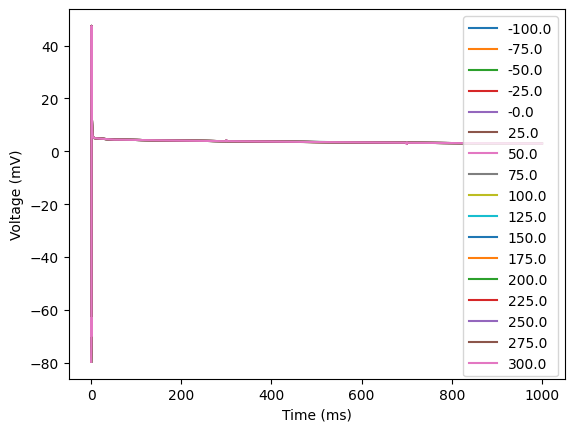

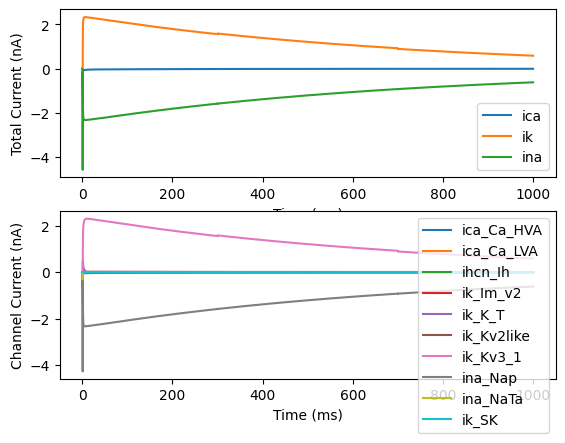

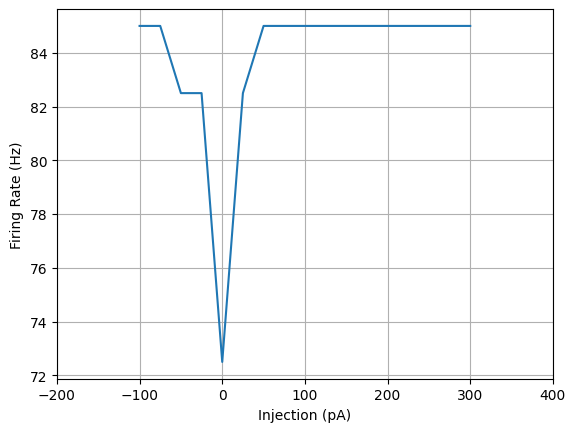

In [ ]:
def count_voltage_events(t, v):
    """
    Counts the number of times the voltage goes above -20 mV and the slope changes from positive to negative.

    Args:
        t: A NumPy array of time points.
        v: A NumPy array of voltage values.

    Returns:
        The number of events.
    """

    # Calculate the slope of the voltage
    slope = np.diff(v)

    # Find the indices where the voltage is above -20 mV
    above_threshold_indices = np.where(v[:-1] > -20)[0]

    # Find the indices where the slope changes from positive to negative
    positive_to_negative_indices = np.where((slope[:-1] > 0) & (slope[1:] < 0))[0]

    # Find the intersection of the two sets of indices
    event_indices = np.intersect1d(above_threshold_indices, positive_to_negative_indices)

    return len(event_indices)

# my code for automatically plotting calculating F/I
import numpy as np
amplitudes = np.arange(-0.1,0.325,0.025)     #1.1,0.1)
firing_rates = []

# simulate all and plot voltages stacked
for amp in amplitudes:
  CI_stim.amp = amp

  vec = utils.record_values()
  i_vec = record_total_currents()
  channel_i_vec = record_channel_currents(channels, predefined_channel_currents)

  # simulate
  h.finitialize()
  h.run()

  t = vec['t'].as_numpy()
  v = vec['v'].as_numpy()
  currents = get_currents(i_vec)
  channel_currents = get_currents(channel_i_vec)

  # plot
  plt.plot(vec['t'].as_numpy(), vec['v'].as_numpy(), label=f"{(CI_stim.amp*1000):.0f} pA")
  plt.xlabel("Time (ms)")
  plt.ylabel("Voltage (mV)")

  # Call the function to count the events
  num_events = count_voltage_events(t, v)

  firing_rates.append(num_events/(CI_stim.dur/1000))

amplitudes = np.round(amplitudes*1000,3)
plt.legend(amplitudes)
plt.show() # voltages

# plot currents and voltage of last current injection
plt.figure()
# plt.subplot(1,3,1)
# plt.plot(vec['t'].as_numpy(), vec['v'].as_numpy(), label=f"{(CI_stim.amp*1000):.0f} pA")
# plt.xlabel("Time (ms)")
# plt.ylabel("Voltage (mV)")
# plt.legend()
plt.subplot(2,1,1)
for current_key in currents.keys():
  plt.plot(t, currents[current_key], label=current_key)
plt.xlabel("Time (ms)")
plt.ylabel("Total Current (nA)")
plt.legend()
# plt.show()
plt.subplot(2,1,2)
for channel_name,current_name in zip(channels, predefined_channel_currents):
  plt.plot(t, channel_currents[channel_name], label=f"{current_name}_{channel_name}")
plt.xlabel("Time (ms)")
plt.ylabel("Channel Current (nA)")
plt.legend()
plt.show()


# plot FI
plt.figure()
plt.plot(amplitudes, firing_rates)
plt.xlabel("Injection (pA)")
plt.ylabel("Firing Rate (Hz)")
plt.xlim(-200, 400)
plt.grid()
plt.show() # FI

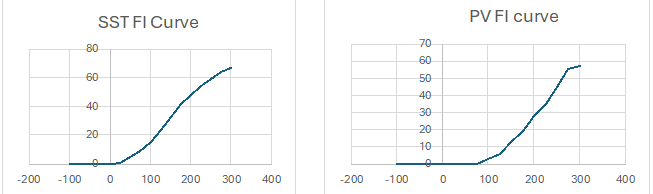

## Adding a synapse

In [ ]:
CI_stim.amp = 0 # turn off current injection

# store in lists to make sure you don't create extra objects when rerunning? #update: it is fine as long as you overwrite the previous python variable
synapses = [] #if 'synapses' not in locals() else synapses
vecstims = [] #if 'vecstims' not in locals() else vecstims
netcons = [] #if 'netcons' not in locals() else netcons

# init synapse
if synapses == []:
  syn = h.AMPA_NMDA(h.soma[0](0.5)) # can change section, segment
  synapses.append(syn)
# change to your synapse. Include your synapse in modfiles/
# can change section, segment

# customize spike train
spike_train = np.array([500])  # [100, 200, 300, 400, 500]) # changing got rid of the other spikes so the first netcon was disabled.

# put spike_train into a hoc vector that can be delivered to synapses
if vecstims == []:
  spike_vec = h.Vector(spike_train)
  stim = h.VecStim()
  stim.play(spike_vec)
  vecstims.append(stim)

# deliver spike_train to synapse using netcon
if netcons == []:
  nc = h.NetCon(stim, syn, 1, 0, 1)
  netcons.append(nc)

In [ ]:
# if you wanna update the spike train without rerunning, use this function to turn off other netcons, and adjust code to create new ones
netcons[0].active() # show current status
# netcons[0].active(False) # inactivate

True

Text(0, 0.5, 'Voltage (mV)')

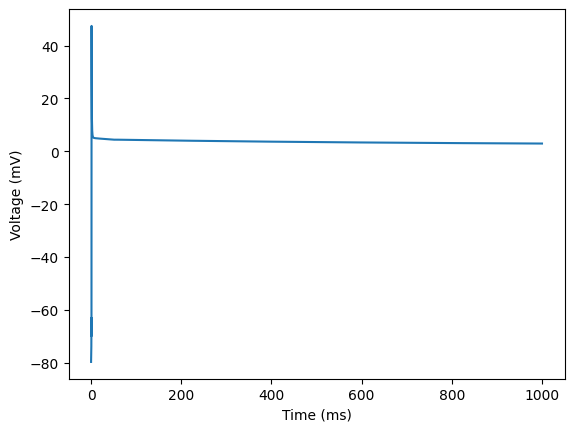

In [ ]:
  vec = utils.record_values()

  # simulate
  h.finitialize()
  h.run()

  t = vec['t'].as_numpy()
  v = vec['v'].as_numpy()
  plt.plot(vec['t'].as_numpy(), vec['v'].as_numpy())
  plt.xlabel("Time (ms)")
  plt.ylabel("Voltage (mV)")

## Homework

1. Choose any active mouse cell model from the [database](http://celltypes.brain-map.org/data). When searching, put "Has All-active Biophysical model" on.
2. Simulate the cell for different values of current injection (CI). Plot voltage responses (t vs V) for each CI. Then plot the FI curve.